In [2]:
import pandas as pd

# Loading the CSV file
lyrics_data = pd.read_csv('data.csv')

# Data preview
print(lyrics_data.head())


                Title         Artist                 Album Release_Date  \
0    Die With A Smile      Lady Gaga      Die With A Smile   2024-08-16   
1                APT.           ROSÉ                  APT.   2024-10-18   
2  BIRDS OF A FEATHER  Billie Eilish  HIT ME HARD AND SOFT   2024-05-17   
3                 Who          Jimin                  MUSE   2024-07-19   
4             Tu Boda   Oscar Maydon               Tu Boda   2024-09-26   

                                   Available_Markets                    Genre  \
0  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...  art pop, dance pop, pop   
1  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...                    k-pop   
2  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...             art pop, pop   
3  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...                    k-pop   
4  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...                  corrido   

           ISRC                                             Ly

In [14]:
# Preview column names
lyrics_data.info()
print(lyrics_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               2693 non-null   object 
 1   Artist              2693 non-null   object 
 2   Album               2693 non-null   object 
 3   Release_Date        2693 non-null   object 
 4   Available_Markets   2310 non-null   object 
 5   Genre               2588 non-null   object 
 6   ISRC                2693 non-null   object 
 7   Lyrics              2693 non-null   object 
 8   Tempo               2693 non-null   float64
 9   Key                 2693 non-null   int64  
 10  Mode                2693 non-null   int64  
 11  Danceability        2693 non-null   float64
 12  Energy              2693 non-null   float64
 13  Instrumentalness    2693 non-null   float64
 14  Acousticness        2693 non-null   float64
 15  Speechiness         2693 non-null   float64
 16  Valenc

In [16]:
# Count missing values per column
print(lyrics_data.isnull().sum())


Title                   0
Artist                  0
Album                   0
Release_Date            0
Available_Markets     383
Genre                 105
ISRC                    0
Lyrics                  0
Tempo                   0
Key                     0
Mode                    0
Danceability            0
Energy                  0
Instrumentalness        0
Acousticness            0
Speechiness             0
Valence                 0
Loudness                0
Track_Popularity        0
Duration (min:sec)      0
Duration (ms)           0
Artist Followers        0
dtype: int64


In [18]:
# Drop rows with missing lyrics
# lyrics_data = lyrics_data.dropna(subset=['lyrics'])

# Fill missing metadata with placeholders (if necessary)
lyrics_data['Available_Markets'] = lyrics_data['Available_Markets'].fillna('Unknown')
lyrics_data['Genre'] = lyrics_data['Genre'].fillna('Unknown')

In [20]:
#checking for null values again
print(lyrics_data.isnull().sum())

Title                 0
Artist                0
Album                 0
Release_Date          0
Available_Markets     0
Genre                 0
ISRC                  0
Lyrics                0
Tempo                 0
Key                   0
Mode                  0
Danceability          0
Energy                0
Instrumentalness      0
Acousticness          0
Speechiness           0
Valence               0
Loudness              0
Track_Popularity      0
Duration (min:sec)    0
Duration (ms)         0
Artist Followers      0
dtype: int64


In [22]:
# Count duplicates
duplicate_count = lyrics_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 40


In [24]:
# Remove duplicate rows
lyrics_data = lyrics_data.drop_duplicates()


In [26]:
import re

# Define a function to clean the lyrics
def clean_lyrics(lyric):
    # Match and remove the unwanted part using regex
    cleaned_lyric = re.sub(r"^.*?Lyrics\s*", "", lyric)
    return cleaned_lyric

# Apply the cleaning function to the 'lyrics' column
lyrics_data['Lyrics'] = lyrics_data['Lyrics'].apply(clean_lyrics)

# At this point, 'lyrics_data' has the cleaned lyrics
# You can proceed with further processing without saving to another file

# Display the first few rows of the cleaned DataFrame
print(lyrics_data.head())

                Title         Artist                 Album Release_Date  \
0    Die With A Smile      Lady Gaga      Die With A Smile   2024-08-16   
1                APT.           ROSÉ                  APT.   2024-10-18   
2  BIRDS OF A FEATHER  Billie Eilish  HIT ME HARD AND SOFT   2024-05-17   
3                 Who          Jimin                  MUSE   2024-07-19   
4             Tu Boda   Oscar Maydon               Tu Boda   2024-09-26   

                                   Available_Markets                    Genre  \
0  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...  art pop, dance pop, pop   
1  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...                    k-pop   
2  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...             art pop, pop   
3  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...                    k-pop   
4  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...                  corrido   

           ISRC                                             Ly

/var/folders/60/jvz1zvf119jdj4v_32sxvg_80000gn/T/ipykernel_73623/3672157426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_data['Lyrics'] = lyrics_data['Lyrics'].apply(clean_lyrics)


In [30]:
# Function to remove "Embed" or similar patterns at the end of the lyrics
def remove_embed(lyric):
    # Pattern to match "Embed" or variations like "28Embed" at the end
    return re.sub(r'\d*Embed$', '', lyric).strip()

# Apply the function to the Lyrics column
lyrics_data['Lyrics'] = lyrics_data['Lyrics'].apply(remove_embed)


/var/folders/60/jvz1zvf119jdj4v_32sxvg_80000gn/T/ipykernel_73623/4128026251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_data['Lyrics'] = lyrics_data['Lyrics'].apply(remove_embed)


In [32]:
# Save the cleaned dataset
cleaned_file_path = "cleaned_lyrical_data.csv"
lyrics_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to cleaned_lyrical_data.csv


Music Therapy Applications - Use lyrics with specific sentiments to curate playlists for therapeutic purposes, such as anxiety relief or motivation.

Saved Relaxation playlist to relaxation_playlist.csv.
Saved General playlist to general_playlist.csv.
Saved Motivation playlist to motivation_playlist.csv.
Saved Anxiety Relief playlist to anxiety_relief_playlist.csv.


/var/folders/60/jvz1zvf119jdj4v_32sxvg_80000gn/T/ipykernel_87360/660288546.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


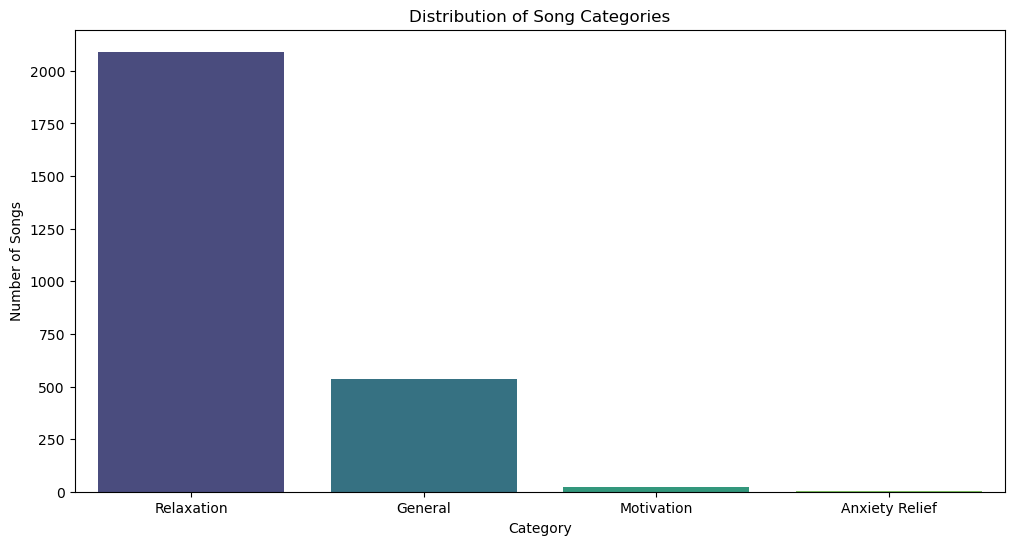

/var/folders/60/jvz1zvf119jdj4v_32sxvg_80000gn/T/ipykernel_87360/660288546.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="coolwarm")
/var/folders/60/jvz1zvf119jdj4v_32sxvg_80000gn/T/ipykernel_87360/660288546.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="coolwarm")
/var/folders/60/jvz1zvf119jdj4v_32sxvg_80000gn/T/ipykernel_87360/660288546.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axe

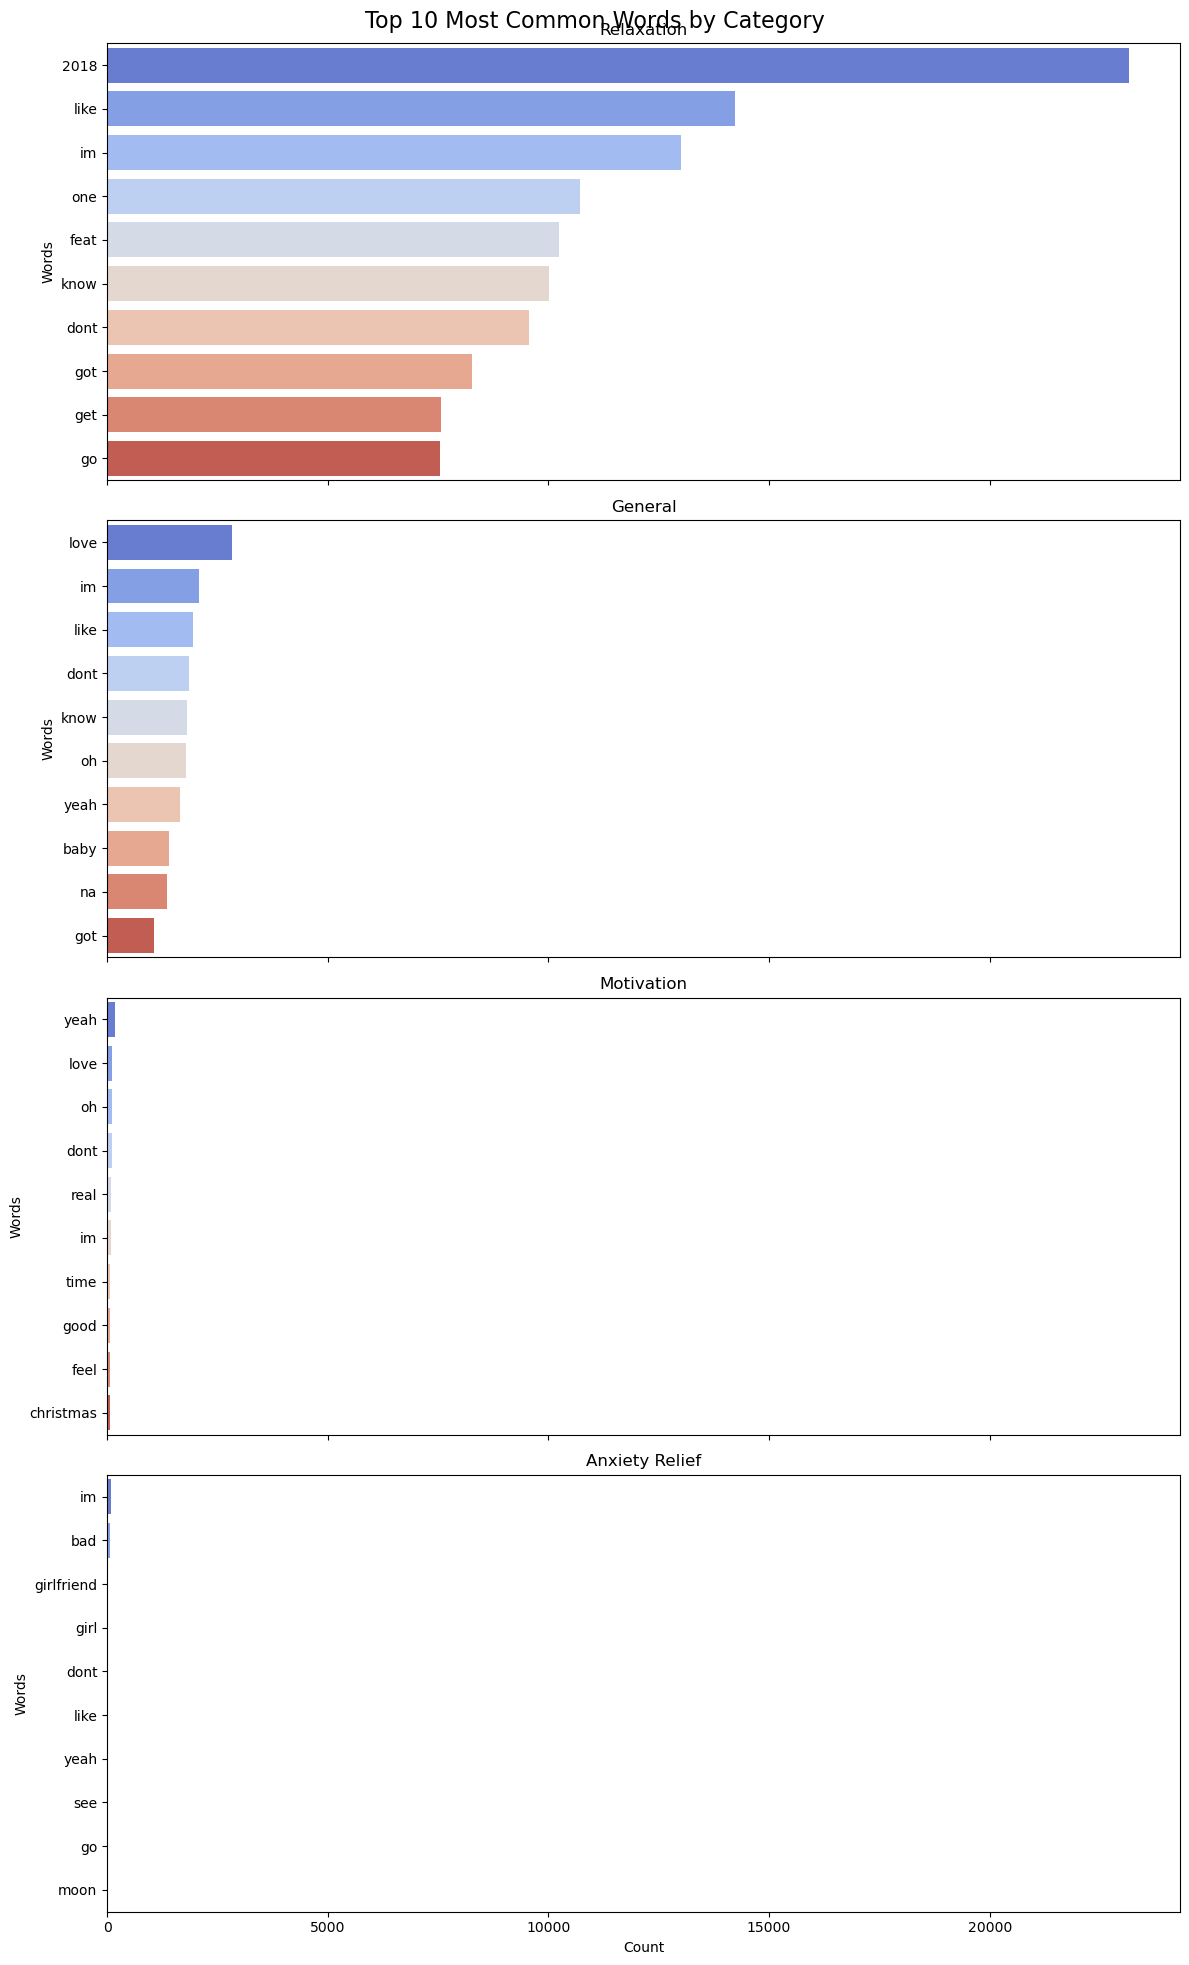

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(cleaned_tokens)

# Load and preprocess data
clean_data = pd.read_csv('cleaned_lyrical_data.csv')
clean_data['Processed_Lyrics'] = clean_data['Lyrics'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(clean_data['Processed_Lyrics'])
y = clean_data['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Function to analyze sentiment of new lyrics
def analyze_sentiment(lyric):
    processed_lyric = preprocess_text(lyric)
    tfidf_vector = tfidf.transform([processed_lyric])
    sentiment = rf_classifier.predict(tfidf_vector)[0]
    return sentiment

# Apply sentiment analysis to the original DataFrame and create a new 'Category' column
clean_data['Category'] = clean_data['Lyrics'].apply(analyze_sentiment)

# Save the updated DataFrame back to a new CSV file
clean_data.to_csv('cleaned_lyrical_data.csv', index=False)

# Create playlists based on categories
playlists = clean_data.groupby('Category')['Title'].apply(list).to_dict()

# Save category-specific playlists to individual CSV files
for category in clean_data['Category'].unique():
    category_data = clean_data[clean_data['Category'] == category]
    filename = f"{category.replace(' ', '_').lower()}_playlist.csv"
    category_data.to_csv(filename, index=False)
    print(f"Saved {category} playlist to {filename}.")

# Visualization 1: Distribution of Categories
plt.figure(figsize=(12, 6))
category_counts = clean_data['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Distribution of Song Categories')
plt.xlabel('Category')
plt.ylabel('Number of Songs')
plt.show()


# Visualization 3: Top 10 Most Common Words by Category
def get_top_words(category):
    lyrics = ' '.join(clean_data[clean_data['Category'] == category]['Processed_Lyrics'])
    words = lyrics.split()
    return Counter(words).most_common(10)

categories = clean_data['Category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(12, 5*len(categories)), sharex=True)
fig.suptitle('Top 10 Most Common Words by Category', fontsize=16)

for i, category in enumerate(categories):
    top_words = get_top_words(category)
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{category}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Words")

plt.tight_layout()
plt.show()

Mood Playlist


Happy and Upbeat Playlist:
+-------------------------+-------------------+-------------------------+
| Title                   | Artist            | Album                   |
+-------------------------+-------------------+-------------------------+
| APT.                    | ROSÉ              | APT.                    |
| Taste                   | Sabrina Carpenter | Short n' Sweet          |
| Espresso                | Sabrina Carpenter | Short n' Sweet          |
| Good Luck, Babe!        | Chappell Roan     | Good Luck, Babe!        |
| Please Please Please    | Sabrina Carpenter | Short n' Sweet          |
| Locked out of Heaven    | Bruno Mars        | Unorthodox Jukebox      |
| Moonlit Floor (Kiss Me) | LISA              | Moonlit Floor (Kiss Me) |
| Bed Chem                | Sabrina Carpenter | Short n' Sweet          |
| Mantra                  | JENNIE            | Mantra                  |
| That's What I Like      | Bruno Mars        | 24K Magic               |
+---------

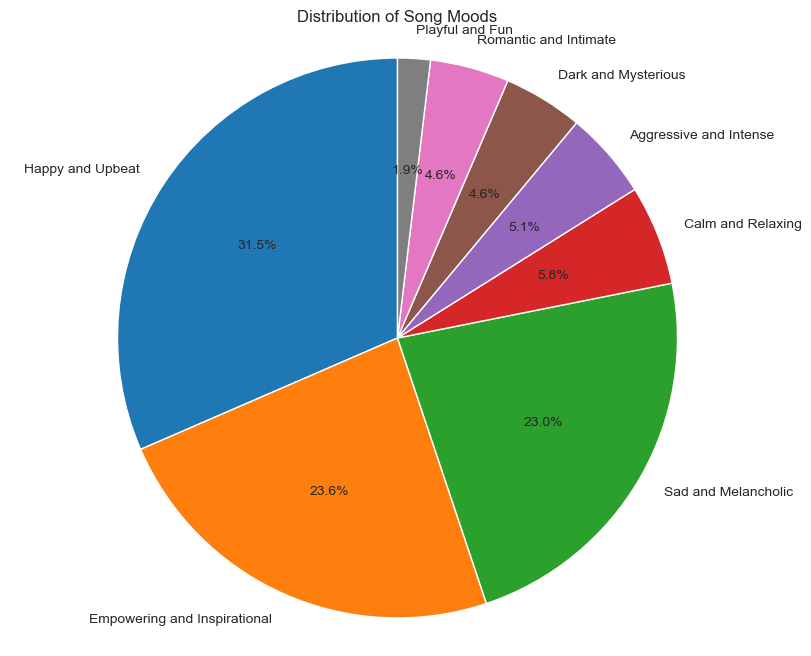

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from prettytable import PrettyTable

# 1. Sentiment Analysis
sia = SentimentIntensityAnalyzer()
clean_data['sentiment'] = clean_data['Lyrics'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 2. Topic Modeling with sklearn
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(clean_data['Lyrics'])

# Number of topics
n_topics = 5

lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(doc_term_matrix)

# Get topic distribution for each song
topic_distributions = lda.transform(doc_term_matrix)

# 3. Combine features for clustering
features = np.hstack((clean_data[['Valence', 'Energy', 'Danceability']].values, 
                      clean_data['sentiment'].values.reshape(-1, 1), 
                      topic_distributions))

# 4. Clustering
kmeans = KMeans(n_clusters=8, random_state=42)
clean_data['cluster'] = kmeans.fit_predict(features)

# 5. Assign mood labels
mood_labels = [
    "Happy and Upbeat",
    "Sad and Melancholic",
    "Calm and Relaxing",
    "Romantic and Intimate",
    "Dark and Mysterious",
    "Empowering and Inspirational",
    "Aggressive and Intense",
    "Playful and Fun"
]

# Simple mapping based on cluster number (you might want to refine this)
clean_data['mood'] = clean_data['cluster'].map(dict(enumerate(mood_labels)))
clean_data.to_csv('cleaned_lyrical_data.csv', index=False)

# 6. Generate playlists
playlists = {mood: clean_data[clean_data['mood'] == mood][['Title', 'Artist', 'Album']] for mood in mood_labels}

# Print playlists in pretty table format
for mood, playlist in playlists.items():
    print(f"\n{mood} Playlist:")
    table = PrettyTable()
    table.field_names = ["Title", "Artist", "Album"]
    table.align["Title"] = "l"
    table.align["Artist"] = "l"
    table.align["Album"] = "l"
    table.max_width["Title"] = 30
    table.max_width["Artist"] = 20
    table.max_width["Album"] = 30
    
    for _, row in playlist.head(10).iterrows():
        table.add_row([row['Title'], row['Artist'], row['Album']])
    
    print(table)



# Visualization functions
def plot_mood_distribution(clean_data):
    mood_counts = clean_data['mood'].value_counts()
    plt.figure(figsize=(10, 8))
    plt.pie(mood_counts.values, labels=mood_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Song Moods')
    plt.axis('equal')
    plt.show()



# Set Seaborn style
sns.set_style('whitegrid')

# Generate visualizations
plot_mood_distribution(clean_data)